# Analisi Esplorativa del Dataset LendingClub

Iniziamo l'esplorazione del dataset che contiene informazioni sui prestiti concessi da LendingClub. L'obiettivo è:
1. Caricare e visualizzare la struttura del dataset
2. Comprendere le variabili disponibili
3. Identificare eventuali problemi nei dati

Prima fase: caricamento del dataset e ispezione delle colonne per capire quali trasformazioni saranno necessarie.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('loans.csv')

data.columns

Index(['customer.id', 'credit.policy', 'purpose', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid'],
      dtype='object')

# Rinomina delle Variabili per Maggiore Chiarezza

I nomi originali delle colonne contengono punti e abbreviazioni che possono rendere il codice meno leggibile e potenzialmente causare problemi. Procediamo a:

1. Rimuovere i punti dai nomi delle colonne
2. Utilizzare il formato snake_case (standard in Python)
3. Rendere i nomi più descrittivi e comprensibili
4. Mantenere alcuni acronimi standard del settore (es. FICO, DTI)

In [3]:
new_columns = {
    'customer.id': 'customer_id',
    'credit.policy': 'credit_policy', 
    'purpose': 'purpose',
    'int.rate': 'interest_rate',
    'installment': 'installment',
    'log.annual.inc': 'log_annual_income',
    'dti': 'dti',         
    'fico': 'fico_score',             
    'days.with.cr.line': 'credit_history_days',
    'revol.bal': 'revolving_balance',
    'revol.util': 'revolving_util',
    'inq.last.6mths': 'inquiries_last_6m',
    'delinq.2yrs': 'delinquencies_2y',
    'pub.rec': 'public_records',
    'not.fully.paid': 'not_fully_paid'
}

data = data.rename(columns=new_columns)


print(data.columns.tolist())

['customer_id', 'credit_policy', 'purpose', 'interest_rate', 'installment', 'log_annual_income', 'dti', 'fico_score', 'credit_history_days', 'revolving_balance', 'revolving_util', 'inquiries_last_6m', 'delinquencies_2y', 'public_records', 'not_fully_paid']


## Descrizione delle Variabili

- **customer_id**: Identificatore univoco del cliente
- **credit_policy**: Flag binario (0/1) che indica se il cliente soddisfa i criteri della politica creditizia
- **purpose**: Scopo dichiarato del prestito (es. consolidamento debiti, carta di credito, etc.)
- **interest_rate**: Tasso di interesse applicato al prestito (percentuale)
- **installment**: Importo della rata mensile del prestito
- **log_annual_income**: Logaritmo naturale del reddito annuale del cliente
- **dti**: Debt-to-Income ratio - Rapporto tra debito mensile totale e reddito mensile
- **fico_score**: Punteggio creditizio FICO (range 300-850)
- **credit_history_days**: Numero di giorni trascorsi dall'apertura della prima linea di credito
- **revolving_balance**: Saldo corrente sulle linee di credito revolving
- **revolving_util**: Tasso di utilizzo del credito revolving (saldo/limite di credito)
- **inquiries_last_6m**: Numero di richieste di informazioni creditizie negli ultimi 6 mesi
- **delinquencies_2y**: Numero di ritardi nei pagamenti negli ultimi 2 anni
- **public_records**: Numero di eventi negativi nei registri pubblici (fallimenti, pignoramenti, etc.)
- **not_fully_paid**: Variabile binaria che indica se il prestito è stato completamente rimborsato (0) o no (1)

In [4]:
data.head(10)

,customer_id,credit_policy,purpose,interest_rate,installment,log_annual_income,dti,fico_score,credit_history_days,revolving_balance,revolving_util,inquiries_last_6m,delinquencies_2y,public_records,not_fully_paid
0,10001,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854.0,52.1,0.0,0,0,0
1,10002,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623.0,76.7,0.0,0,0,0
2,10003,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511.0,25.6,1.0,0,0,0
3,10004,1,debt_consolidation,0.1008,162.34,11.350407,8.1,712,2699.958333,33667.0,73.2,1.0,0,0,0
4,10005,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740.0,39.5,0.0,1,0,0
5,10006,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807.0,51,0.0,0,0,0
6,10007,1,debt_consolidation,0.1496,194.02,10.714418,4,667,3180.041667,3839.0,76.8,0.0,0,1,1
7,10008,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220.0,68.6,0.0,0,0,1
8,10009,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909.0,51.1,1.0,0,0,0
9,10010,1,debt_consolidation,0.1221,84.12,10.203592,10,707,2730.041667,5630.0,23,1.0,0,0,0


In [5]:
print(len(data))

9578


# Analisi Preliminare dei Valori Nulli

Dall'ispezione iniziale emerge che i valori 0 nel dataset hanno un significato semantico e non rappresentano dati mancanti. Per esempio:
- 0 in `credit_policy` indica che il cliente non soddisfa i criteri
- 0 in `delinquencies_2y` indica assenza di ritardi nei pagamenti
- 0 in `public_records` indica assenza di eventi negativi

Questi valori sono quindi significativi per l'analisi e non devono essere trattati come dati mancanti.

# Gestione dei Valori Mancanti

Durante la fase di pulizia dei dati, abbiamo identificato alcuni valori mancanti nel dataset. Data la dimensione significativa del dataset, abbiamo due opzioni principali:

1. **Approccio Immediato**: 
   - Procedere con l'analisi usando solo i record completi
   - Utile per una prima esplorazione dei dati

2. **Approccio Successivo**:
   - Analizzare il pattern dei valori mancanti
   - Valutare tecniche di imputazione appropriate (media, mediana, KNN)
   - Considerare l'impatto dei valori mancanti sulle analisi successive

La scelta dipenderà dalla quantità di dati mancanti e dal loro impatto sulle variabili di interesse.

In [6]:
missing = data[data['customer_id']==0]

print(len(missing))

0


In [7]:
data.loc[30]

customer_id                         10031
credit_policy                           1
purpose                debt_consolidation
interest_rate                      0.0807
installment                        156.84
log_annual_income               11.512925
dti                                   2.3
fico_score                            742
credit_history_days           3148.958333
revolving_balance                  9698.0
revolving_util                       19.4
inquiries_last_6m                     0.0
delinquencies_2y                        0
public_records                          0
not_fully_paid                          0
Name: 30, dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          9578 non-null   int64  
 1   credit_policy        9578 non-null   object 
 2   purpose              9578 non-null   object 
 3   interest_rate        9578 non-null   float64
 4   installment          9578 non-null   float64
 5   log_annual_income    9573 non-null   float64
 6   dti                  9578 non-null   object 
 7   fico_score           9578 non-null   int64  
 8   credit_history_days  9549 non-null   float64
 9   revolving_balance    9577 non-null   float64
 10  revolving_util       9516 non-null   object 
 11  inquiries_last_6m    9548 non-null   float64
 12  delinquencies_2y     9549 non-null   object 
 13  public_records       9549 non-null   object 
 14  not_fully_paid       9578 non-null   int64  
dtypes: float64(6), int64(3), object(6)
mem

In [9]:
data.describe()

,customer_id,interest_rate,installment,log_annual_income,fico_score,credit_history_days,revolving_balance,inquiries_last_6m,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9573.000000,9578.000000,9549.000000,9.577000e+03,9548.000000,9578.000000
mean,14789.500000,0.125529,319.089413,10.931892,711.159532,4562.026085,1.691529e+04,1.571743,0.160054
std,2765.074773,0.202225,207.071301,0.614766,42.024737,2497.985733,3.375770e+04,2.198151,0.366676
min,10001.000000,0.060000,15.670000,7.547502,612.000000,178.958333,0.000000e+00,0.000000,0.000000
25%,12395.250000,0.103900,163.770000,10.558414,682.000000,2820.000000,3.187000e+03,0.000000,0.000000
50%,14789.500000,0.122100,268.950000,10.928238,707.000000,4139.958333,8.596000e+03,1.000000,0.000000
75%,17183.750000,0.140700,432.762500,11.289832,737.000000,5730.000000,1.825200e+04,2.000000,0.000000
max,19578.000000,14.700000,940.140000,14.528354,1812.000000,17639.958330,1.207359e+06,33.000000,1.000000


# Pulizia e Conversione dei Tipi di Dato

Alcune variabili sono state importate con tipo `object` ma rappresentano dati numerici. È necessario convertirle al tipo appropriato per:

1. **Ottimizzare la Memoria**:
   - I tipi corretti occupano meno spazio
   - Migliorano le performance delle operazioni

2. **Abilitare Operazioni Matematiche**:
   - Calcolo di statistiche descrittive
   - Analisi numeriche e grafici

3. **Garantire la Consistenza**:
   - Variabili binarie come `Int64`
   - Percentuali e rapporti come `float`
   - Conteggi come `Int64`

Le conversioni verranno effettuate usando `pd.to_numeric()` con gestione appropriata degli errori.

In [10]:
# Convertiamo i tipi di dato corretti
# credit.policy dovrebbe essere int (0 o 1)
data['credit_policy'] = pd.to_numeric(data['credit_policy'], errors='coerce').astype('Int64')

# dti (debt-to-income ratio) dovrebbe essere float
data['dti'] = pd.to_numeric(data['dti'], errors='coerce')

# revol.util (revolving utilization) dovrebbe essere float
data['revolving_util'] = pd.to_numeric(data['revolving_util'], errors='coerce')

# delinq.2yrs dovrebbe essere int (numero di ritardi)
data['delinquencies_2y'] = pd.to_numeric(data['delinquencies_2y'], errors='coerce').astype('Int64')

# pub.rec dovrebbe essere int (numero di registrazioni pubbliche)
data['public_records'] = pd.to_numeric(data['public_records'], errors='coerce').astype('Int64')

print(f"Valori mancanti per colonna:")
percent_missing = data.isnull().mean() * 100
print(percent_missing)


Valori mancanti per colonna:
customer_id            0.000000
credit_policy          0.020881
purpose                0.000000
interest_rate          0.000000
installment            0.000000
log_annual_income      0.052203
dti                    0.010441
fico_score             0.000000
credit_history_days    0.302777
revolving_balance      0.010441
revolving_util         0.657757
inquiries_last_6m      0.313218
delinquencies_2y       0.313218
public_records         0.313218
not_fully_paid         0.000000
dtype: float64


In [11]:
data[data['delinquencies_2y'].isna()]


,customer_id,credit_policy,purpose,interest_rate,installment,log_annual_income,dti,fico_score,credit_history_days,revolving_balance,revolving_util,inquiries_last_6m,delinquencies_2y,public_records,not_fully_paid
245,10246,1,debt_consolidation,0.1091,304.90,11.163684,18.96,692,5430.0,5749.0,43.2,1.0,<NA>,0,0
7725,17726,0,all_other,0.0775,156.11,11.156251,8.81,772,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7726,17727,0,all_other,0.0838,204.84,NaN,4.00,742,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7727,17728,0,all_other,0.0807,136.45,11.695247,4.00,742,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7728,17729,0,all_other,0.0933,80.69,11.608236,10.00,712,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7729,17730,0,all_other,0.0933,124.62,11.492723,10.00,707,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7731,17732,0,all_other,0.1028,164.42,11.461632,10.00,702,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7732,17733,0,all_other,0.0964,32.11,9.392662,10.00,697,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7733,17734,0,all_other,0.0996,103.20,11.918391,10.00,692,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7734,17735,0,all_other,0.1028,113.39,12.100712,10.00,687,NaN,0.0,NaN,NaN,<NA>,<NA>,0


# Analisi Univariata delle Distribuzioni

Analizziamo la distribuzione di tutte le variabili numeriche nel dataset, dividendole in due categorie:

1. **Variabili Continue**:
   - `interest_rate`: Tasso di interesse
   - `installment`: Rata mensile
   - `log_annual_income`: Reddito (log)
   - `dti`: Rapporto debito/reddito
   - `fico_score`: Punteggio creditizio
   - `credit_history_days`: Durata storia creditizia
   - `revolving_balance`: Saldo revolving
   - `revolving_util`: Utilizzo linee revolving

2. **Variabili Discrete** (categoriche o conteggi):
   - `credit_policy`: Binaria (0/1)
   - `delinquencies_2y`: Conteggio ritardi
   - `public_records`: Conteggio eventi negativi
   - `not_fully_paid`: Binaria (0/1)

Per ogni variabile continua calcoleremo e visualizzeremo:
- Distribuzione (istogramma + densità kernel)
- Statistiche principali (media, mediana)
- Indici di forma (asimmetria, curtosi)
- Dispersione (deviazione standard)

Per le variabili discrete mostreremo:
- Distribuzioni di frequenza
- Proporzioni delle diverse categorie

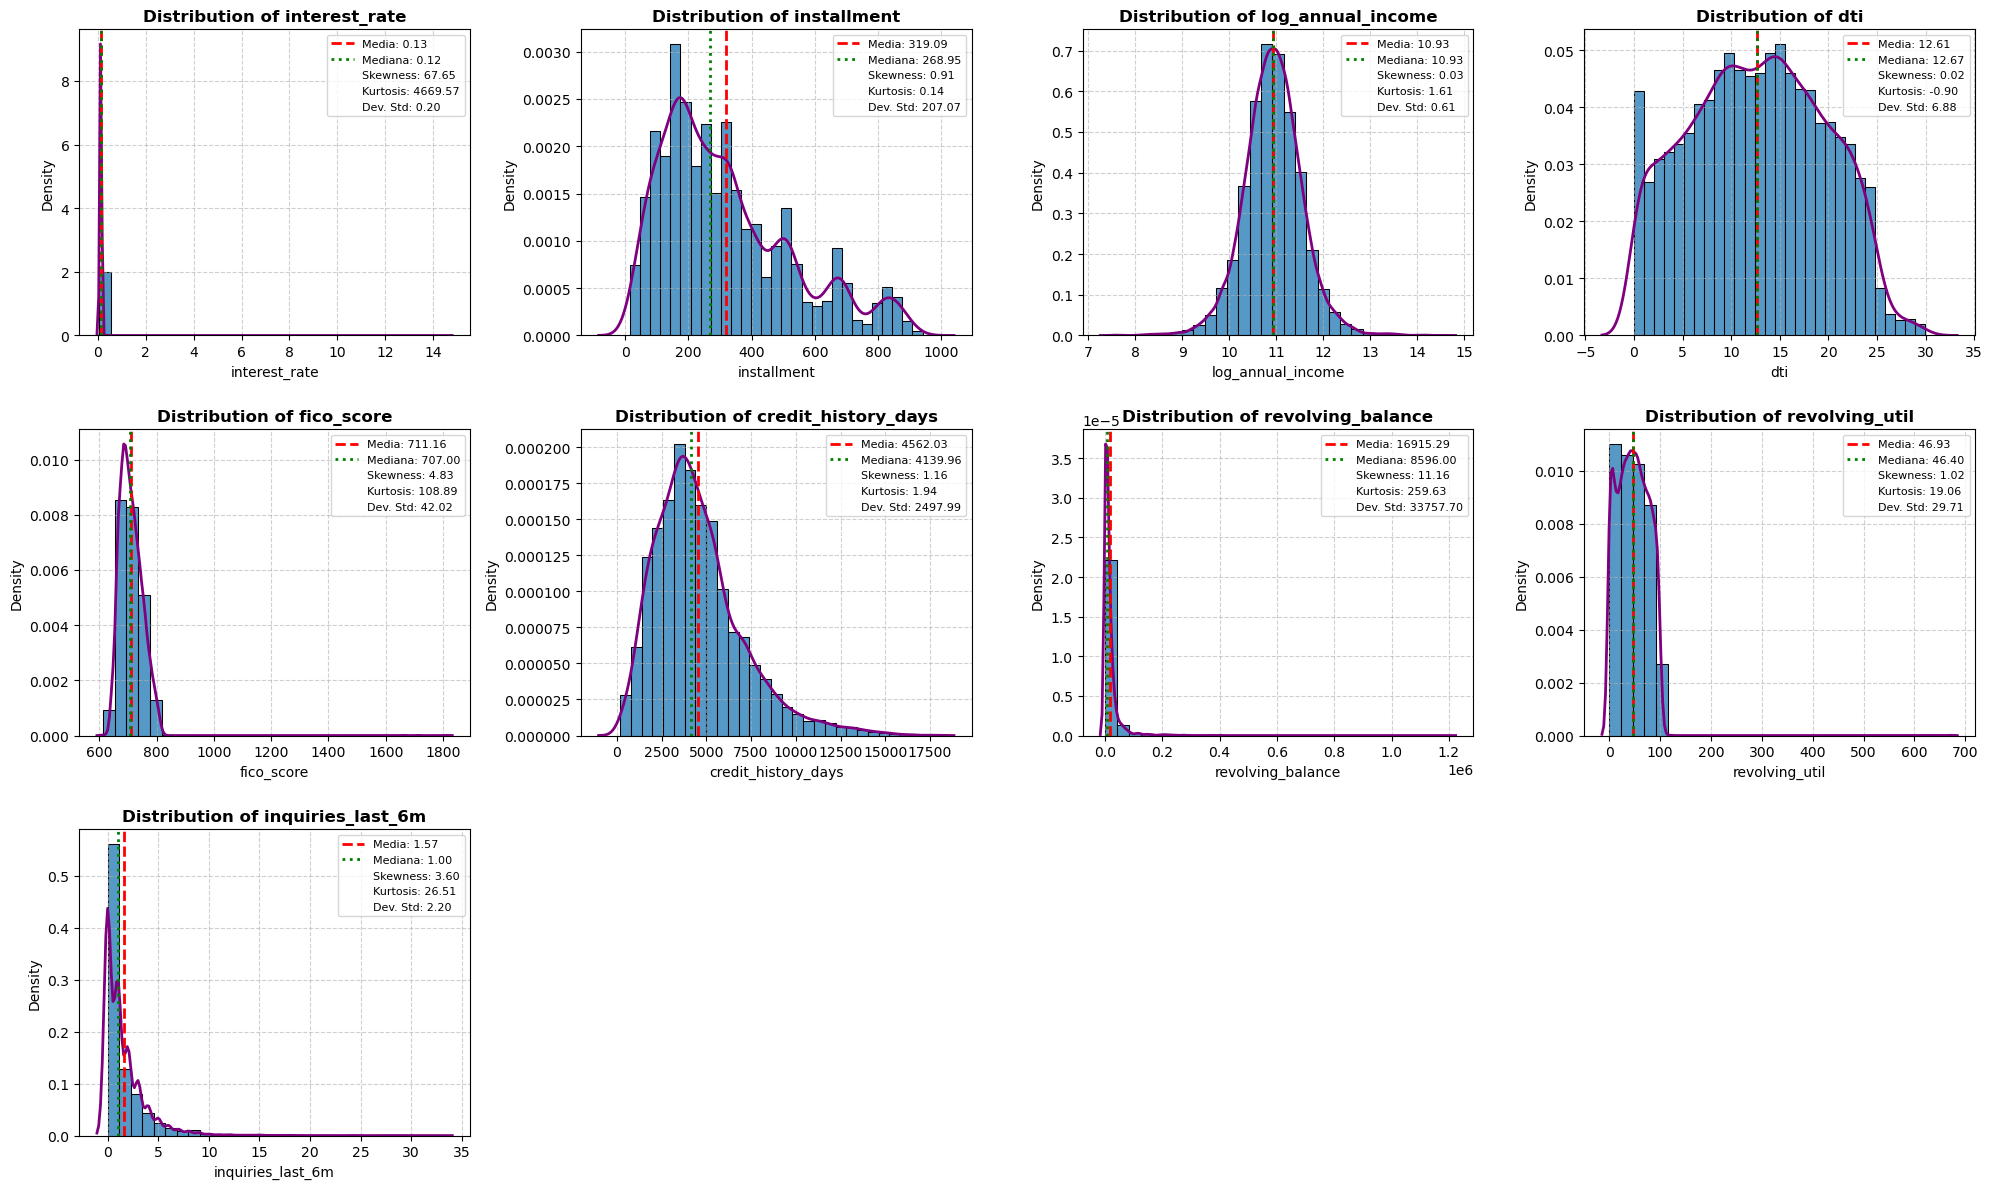

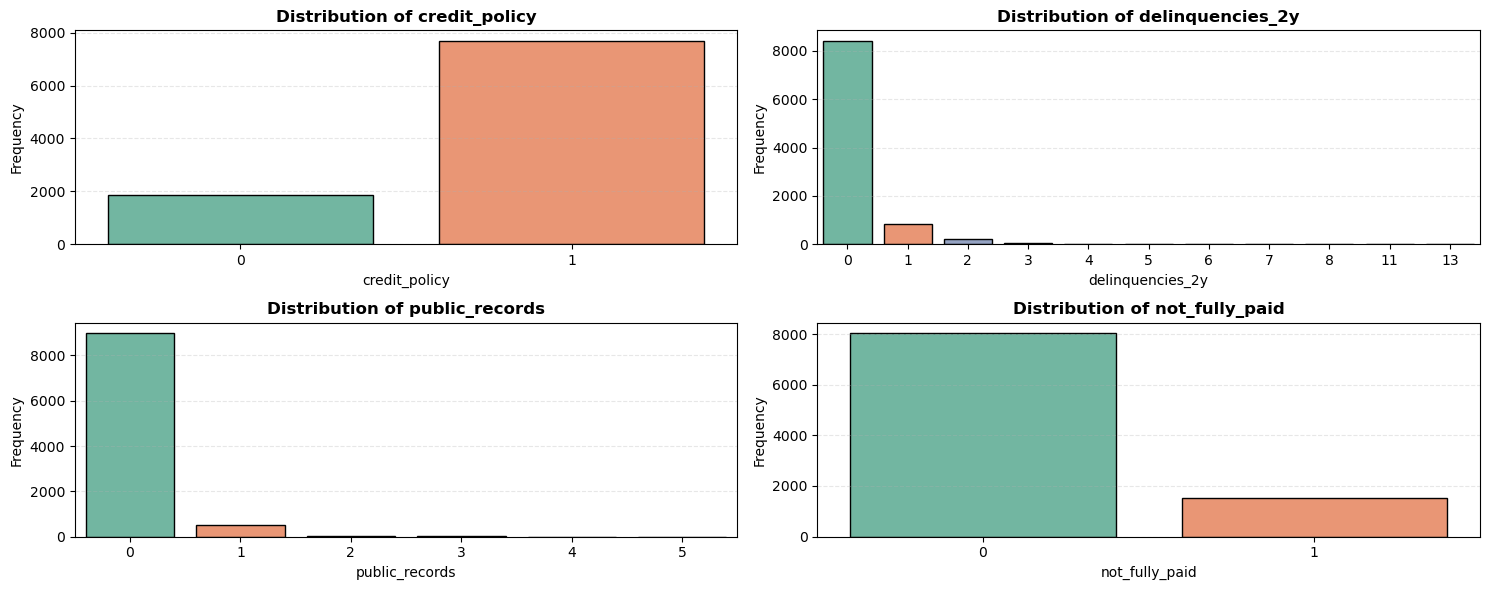

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Separiamo colonne continue e discrete
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop('customer_id')
discrete_cols = ['credit_policy', 'delinquencies_2y', 'public_records', 'not_fully_paid']
continuous_cols = [col for col in numeric_cols if col not in discrete_cols]

# Griglia per variabili CONTINUE (istogramma + KDE)
n_cols_cont = len(continuous_cols)
n_rows_cont = int(np.ceil(n_cols_cont / 4))

plt.figure(figsize=(20, n_rows_cont * 4))

for i, col in enumerate(continuous_cols):
    plt.subplot(n_rows_cont, 4, i+1)
    vals = data[col].dropna()
    bins = np.linspace(vals.min(), vals.max(), 30)
    
    ax = sns.histplot(vals, bins=bins, edgecolor="black", stat='density', kde=False)
    sns.kdeplot(vals, color='purple', lw=2, ax=ax)
    
    plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    
    # Calcoliamo le statistiche
    mean_val = vals.mean()
    median_val = vals.median()
    skew_val = vals.skew()  
    kurt_val = vals.kurt()
    std_val = vals.std()
    
    # Linee verticali per media e mediana
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Mediana: {median_val:.2f}')
    
    # Statistiche nella legenda
    plt.plot([], [], ' ', label=f'Skewness: {skew_val:.2f}')
    plt.plot([], [], ' ', label=f'Kurtosis: {kurt_val:.2f}')
    plt.plot([], [], ' ', label=f'Dev. Std: {std_val:.2f}')
    
    plt.legend(fontsize=8, loc='best')
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Density', fontsize=10)

plt.tight_layout()
plt.show()

# Griglia per variabili DISCRETE (bar plot)
n_cols_disc = len(discrete_cols)
n_rows_disc = int(np.ceil(n_cols_disc / 2))

plt.figure(figsize=(15, n_rows_disc * 3))

for i, col in enumerate(discrete_cols):
    plt.subplot(n_rows_disc, 2, i+1)
    sns.countplot(data=data, x=col, hue=col, palette='Set2', legend=False, edgecolor="black")
    plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

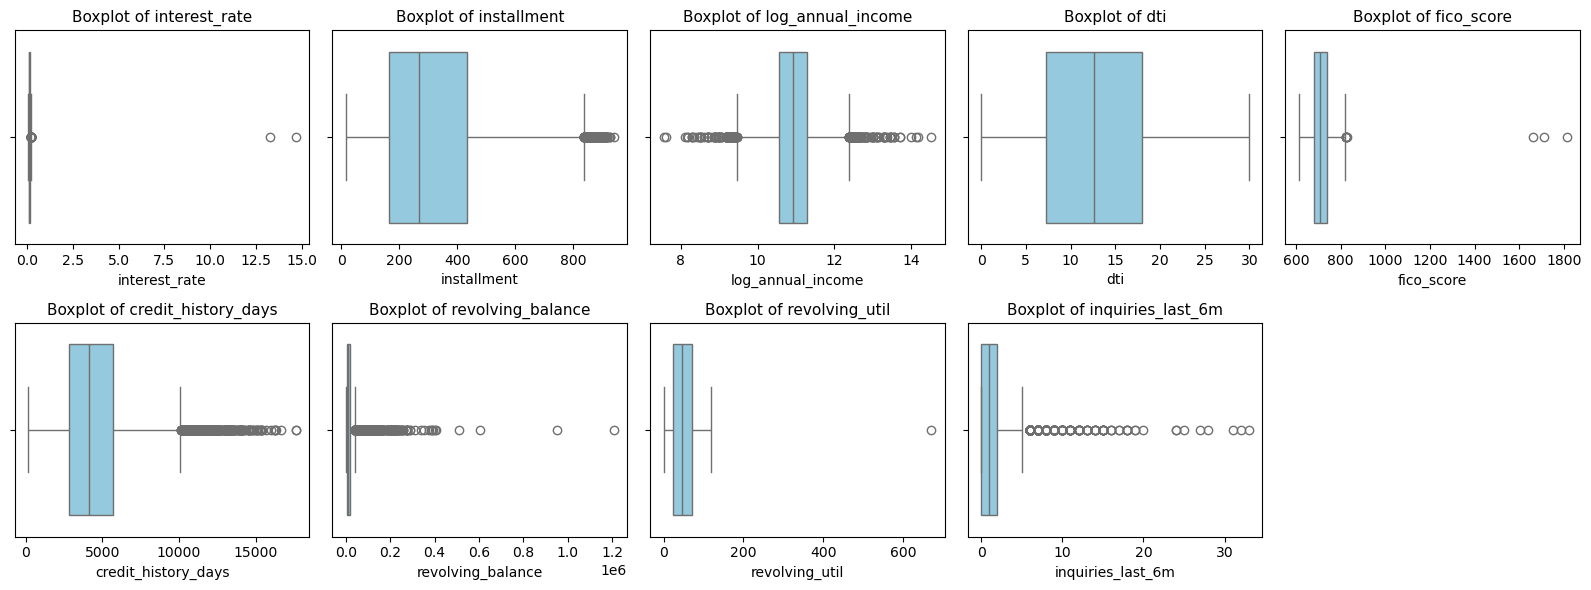

In [13]:
plt.figure(figsize=(16, 6))
for idx, col in enumerate(continuous_cols):
    plt.subplot(2, int(np.ceil(len(continuous_cols)/2)), idx+1)
    sns.boxplot(data=data, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=11)
    plt.xlabel(col)
plt.tight_layout()
plt.show()